<a href="https://colab.research.google.com/github/jchserrano/curso-no-parametrica/blob/master/2_3_Analizando_distribuciones_grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import normal_ad
from scipy.stats import shapiro

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('./iq.csv')

In [11]:
df.head()

,IQ,School
0,147.0,2.0
1,140.0,2.0
2,141.0,1.0
3,141.0,1.0
4,142.0,2.0
5,146.0,1.0
6,143.0,2.0
7,146.0,1.0
8,145.0,1.0
9,146.0,2.0


In [7]:
group1=df[df.School==1.0]
group2=df[df.School==2.0]
group1.head()
group2.head()

,IQ,School
0,147.0,2.0
1,140.0,2.0
4,142.0,2.0
6,143.0,2.0
9,146.0,2.0


In [8]:
mean1=group1.IQ.mean() #149
mean2=group2.IQ.mean() #146.7

In [9]:
res1=group1.IQ - mean1
res2=group2.IQ - mean2

In [12]:
res1

2     -8.0
3     -8.0
5     -3.0
7     -3.0
8     -4.0
10    -5.0
12    -6.0
14    -5.0
16    -8.0
17    -7.0
19    -2.0
20    -8.0
25    -5.0
29     0.0
31     2.0
34     7.0
35    13.0
36    15.0
37    17.0
38    18.0
Name: IQ, dtype: float64

------------------First School------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.00031705273647239117
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0009394694934599102
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


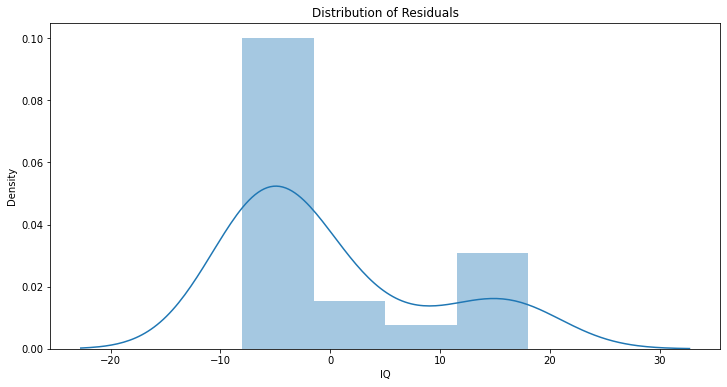


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables 

------------------Second School------------------ 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.01668376405845095
Residuals are not normally distributed 

Using the Shapiro-Wilks test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0037091043777763844
Residuals are not normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


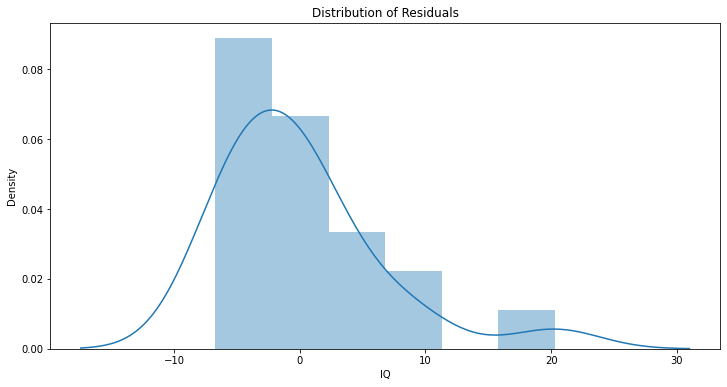


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [10]:
    # Performing the test on the residuals
    p_value_thresh=0.05
    print('------------------First School------------------','\n')
     
    print('Using the Anderson-Darling test for normal distribution')
        
    p_value = normal_ad(res1)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = shapiro(res1)
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(res1)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied', '\n')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables', '\n')

#################################################################################################
    # Performing the test on the residuals
    p_value_thresh=0.05
    print('------------------Second School------------------','\n')
     
    print('Using the Anderson-Darling test for normal distribution')
        
    p_value = normal_ad(res2)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed', '\n')
    else:
        print('Residuals are normally distributed', '\n')
    
    print('Using the Shapiro-Wilks test for normal distribution')
    shapiro_test = stats.shapiro(res2)
    shapiro_test_stat=shapiro_test[0]
    shapiro_test_pvalue=shapiro_test[1]
    print('p-value from the test - below 0.05 generally means non-normal:', shapiro_test_pvalue)
    
    # Reporting the normality of the residuals
    if shapiro_test_pvalue < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(res2)
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

